# Spam Classification

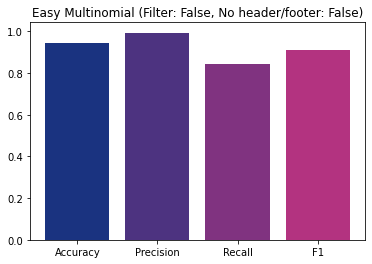

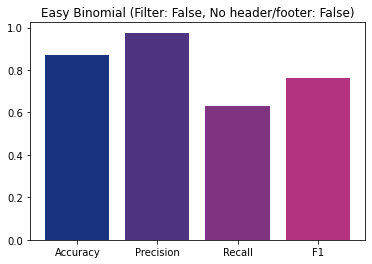

Easy Multinomial (Filter: False, No header/footer: False)
Accuracy: 0.9465171447056286
Precision: 0.9938931297709923
Recall: 0.8443579766536965
F1: 0.9130434782608696

Easy Binomial (Filter: False, No header/footer: False)
Accuracy: 0.8712529652792754
Precision: 0.9758308157099698
Recall: 0.6284046692607004
F1: 0.7644970414201183


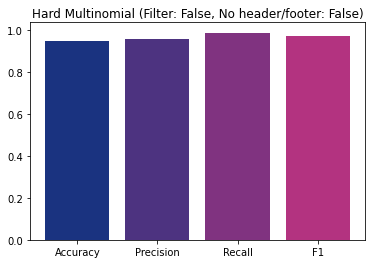

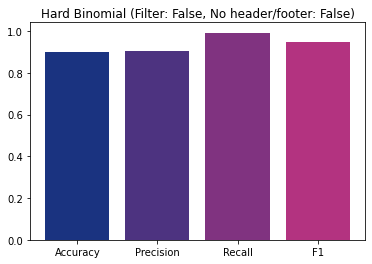

Easy Multinomial (Filter: False, No header/footer: False)
Accuracy: 0.9510774606872452
Precision: 0.9572704081632653
Recall: 0.9888010540184453
F1: 0.9727802981205443

Hard Binomial (Filter: False, No header/footer: False)
Accuracy: 0.9015725101921956
Precision: 0.9051051051051051
Recall: 0.9927536231884058
F1: 0.9469054351240968


In [60]:
import os     
import numpy as np
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt

easy_ham = []
hard_ham = []
spam = []
all_emails_easy = []
all_emails_hard = []
no_header_text = []

FILTER = False
REMOVE_HEADER = False
info = " (Filter: " + str(FILTER) + ", No header/footer: " + str(REMOVE_HEADER) + ")"

### Create list with each email as unit in that list

def read_emails(dir, var):
    read_files = os.listdir(dir)
    for i in read_files:
        with open(dir + i, encoding='Latin1') as f:
            tmp_string = " "

            lines = f.readlines()

            clean_text = BeautifulSoup(tmp_string.join(lines))
            pure_string = str(clean_text)
            
            if REMOVE_HEADER == True:
                lines = pure_string.split("\n")
                no_header_text = ""
                for i in lines:
                    string_index_1 = i.find(":")
                    string_index_2 = i.find("<")
                    string_index_3 = i.find("[")
                    if string_index_1 == -1 and string_index_2 == -1 and string_index_3 == -1:
                        no_header_text += i 
                    
                var.append(no_header_text)
            else:
                var.append(pure_string)
                
    return var
        
easy_ham = read_emails("EASY_HAM/", easy_ham)
hard_ham = read_emails("HARD_HAM/", hard_ham)
spam = read_emails("SPAM/", spam)

# Add sets and create labels
labels_easy_ham = np.zeros(len(easy_ham))
labels_hard_ham = np.zeros(len(hard_ham))
labels_spam = np.ones(len(spam))
labels_easy = np.append(labels_easy_ham, labels_spam)
labels_hard = np.append(labels_hard_ham, labels_spam)

# Combine Ham and Spam
all_emails_easy = easy_ham + spam
all_emails_hard = hard_ham + spam

# Split into train and test sets
X_easy_train, X_easy_test, y_easy_train, y_easy_test = train_test_split(all_emails_easy, 
                                                                        labels_easy, 
                                                                        test_size = 0.80, 
                                                                        random_state = 12)

X_hard_train, X_hard_test, y_hard_train, y_hard_test = train_test_split(all_emails_hard, 
                                                                        labels_hard, 
                                                                        test_size = 0.80, 
                                                                        random_state = 12)

# Convert arrays to transform emails into vectors, use FILTER: True or False for filtering
if FILTER == False: 
    vectors_easy = CountVectorizer()
    vectors_easy.fit(X_easy_train)

    vectors_hard = CountVectorizer()
    vectors_hard.fit(X_hard_train)
else:
    vectors_easy = CountVectorizer(stop_words="english", max_df=0.90)
    vectors_easy.fit(X_easy_train)

    vectors_hard = CountVectorizer(stop_words="english", max_df=0.90)
    vectors_hard.fit(X_hard_train)
    
train_easy_vector = vectors_easy.transform(X_easy_train)
test_easy_vector = vectors_easy.transform(X_easy_test)

train_hard_vector = vectors_easy.transform(X_hard_train)
test_hard_vector = vectors_easy.transform(X_hard_test)

# Train & test model easy
multinomial_bayes = MultinomialNB()
multinomial_bayes.fit(train_easy_vector, y_easy_train)
predictions = multinomial_bayes.predict(test_easy_vector)

bernoulli_bayes = BernoulliNB(binarize = 0)
bernoulli_bayes.fit(train_easy_vector, y_easy_train)
predictions_b = bernoulli_bayes.predict(test_easy_vector)

# print(predictions) easy

bar_color = [(0.1, 0.2, 0.5), (0.3, 0.2, 0.5), (0.5, 0.2, 0.5), (0.7, 0.2, 0.5)]

accuracy_measures_em = ["Easy Multinomial", "Accuracy", "Precision", "Recall", "F1"]
accuracy_values_em = [accuracy_score(y_easy_test, predictions),
                  precision_score(y_easy_test, predictions),
                  recall_score(y_easy_test, predictions),
                  f1_score(y_easy_test, predictions)]

plt.bar(accuracy_measures_em[1:], accuracy_values_em, color = bar_color)
plt.title(accuracy_measures_em[0] + info)
plt.show()

accuracy_measures_eb = ["Easy Binomial", "Accuracy", "Precision", "Recall", "F1"]
accuracy_values_eb = [accuracy_score(y_easy_test, predictions_b),
                  precision_score(y_easy_test, predictions_b),
                  recall_score(y_easy_test, predictions_b),
                  f1_score(y_easy_test, predictions_b)]

plt.bar(accuracy_measures_eb[1:], accuracy_values_eb, color = bar_color)
plt.title(accuracy_measures_eb[0] + info)
plt.show()

print(accuracy_measures_em[0] + info)
for i in range(0, len(accuracy_values_em)):
    print(accuracy_measures_em[i+1] + ": " + str(accuracy_values_em[i]))

print("\n" + accuracy_measures_eb[0] + info)
for i in range(0, len(accuracy_values_eb)):
    print(accuracy_measures_eb[i+1] + ": " + str(accuracy_values_eb[i]))
    
# Train & test model hard
multinomial_bayes = MultinomialNB()
multinomial_bayes.fit(train_hard_vector, y_hard_train)
predictions = multinomial_bayes.predict(test_hard_vector)

bernoulli_bayes = BernoulliNB(binarize = 0)
bernoulli_bayes.fit(train_hard_vector, y_hard_train)
predictions_b = bernoulli_bayes.predict(test_hard_vector)

# print(predictions) hard

accuracy_measures_hm = ["Hard Multinomial", "Accuracy", "Precision", "Recall", "F1"]
accuracy_values_hm = [accuracy_score(y_hard_test, predictions),
                  precision_score(y_hard_test, predictions),
                  recall_score(y_hard_test, predictions),
                  f1_score(y_hard_test, predictions)]

plt.bar(accuracy_measures_hm[1:], accuracy_values_hm, color = bar_color)
plt.title(accuracy_measures_hm[0] + info)
plt.show()

accuracy_measures_hb = ["Hard Binomial", "Accuracy", "Precision", "Recall", "F1"]
accuracy_values_hb = [accuracy_score(y_hard_test, predictions_b),
                  precision_score(y_hard_test, predictions_b),
                  recall_score(y_hard_test, predictions_b),
                  f1_score(y_hard_test, predictions_b)]

plt.bar(accuracy_measures_hb[1:], accuracy_values_hb, color = bar_color)
plt.title(accuracy_measures_hb[0] + info)
plt.show()

print(accuracy_measures_em[0] + info)
for i in range(0, len(accuracy_values_hm)):
    print(accuracy_measures_hm[i+1] + ": " + str(accuracy_values_hm[i]))

print("\n" + accuracy_measures_hb[0] + info)
for i in range(0, len(accuracy_values_hb)):
    print(accuracy_measures_hb[i+1] + ": " + str(accuracy_values_hb[i]))

